<a href="https://colab.research.google.com/github/debbiedebdeb/Algorithm/blob/master/Kaggle%20Data%EB%A5%BC%20%EC%9D%B4%EC%9A%A9%ED%95%9C%20%EA%B3%B5%EB%B6%80/%20%ED%95%84%EC%82%AC%20/%20Factors_Affecting_Success_in_School_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KAGGLE HARUN-UR-RASHID 님의 코드를 필사했습니다. 
___

# 소개글
    In this small project we are trying to do some new thing.We are try to do make a new mode for this project.We also try to use this project for our real life's problems or project.  
    Very quickly we will try to finish this project and represnt some new thing by this project.Have fun and we will open to constructive criticisms that will make this project more effective and interesting.

## Outline of the Project : 

1. Exploratory Data Analysis (EDA) 
2. Machine Learning Algorithm applying 
3. Deep Learning Algorithm applying 

1. What is EDA?


 * In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

 * You can say that EDA is statisticians way of story telling where you explore data, find patterns and tells insights. Often you have some questions in hand you try to validate those questions by performing EDA. Here is my article on EDA.

##Attributes
```
1 Gender - student's gender (nominal: 'Male' or 'Female’)
2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)
```

# 패키지 & 라이브러리 

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
sns.set(style = 'whitegrid')
%matplotlib inline
from plotly import tools
#import plotly.plotly as py  코랩에서 작동 X
from plotly.offline import init_notebook_mode , iplot 
init_notebook_mode(connected = True)

import plotly.graph_objs as go 
import plotly.figure_factory as ff 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
from sklearn.model_selection import cross_val_score 
from xgboost import XGBClassifier, plot_importance 

import os

In [34]:
# kaggle id
os.environ['KAGGLE_USERNAME'] = 'debbiekim'
os.environ['KAGGLE_KEY'] = 'a8238eddcf1957422ed574f5bf5cdf5c'

# data download 
!!kaggle datasets download -d aljarah/xAPI-Edu-Data
!unzip '*.zip'

Archive:  xAPI-Edu-Data.zip
replace xAPI-Edu-Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [36]:
df = pd.read_csv('/content/xAPI-Edu-Data.csv')

#DataSets 

In [39]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [41]:
# checking missing data 
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

# EDA

## Gender Value Counts & PCT in Dataset

In [42]:
df.gender.value_counts()

M    305
F    175
Name: gender, dtype: int64

%
 M    0.635417
F    0.364583
Name: gender, dtype: float64


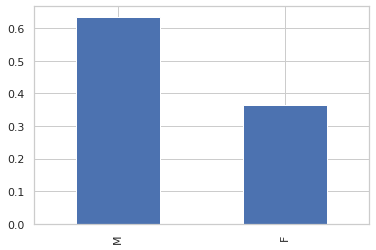

In [47]:
print('%\n', df.gender.value_counts(normalize = True )) #등급별 비율 확인 = normalize = True
df.gender.value_counts(normalize = True).plot(kind = 'bar') 

##Nationality value counts & %

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64
%]n KW             0.372917
Jordan         0.358333
Palestine      0.058333
Iraq           0.045833
lebanon        0.035417
Tunis          0.025000
SaudiArabia    0.022917
Egypt          0.018750
Syria          0.014583
USA            0.012500
Iran           0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: NationalITy, dtype: float64


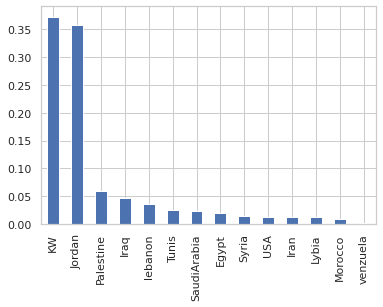

In [51]:
print(df.NationalITy.value_counts()) 
print('%]n', df.NationalITy.value_counts(normalize = True))
df.NationalITy.value_counts(normalize = True).plot(kind = 'bar')

##PlaceofBirth Value Counts & Percentage In Dataset

In [52]:
print(df['PlaceofBirth'].value_counts())
print(df['PlaceofBirth'].value_counts(normalize = True))

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64
KuwaIT         0.375000
Jordan         0.366667
Iraq           0.045833
lebanon        0.039583
SaudiArabia    0.033333
USA            0.033333
Palestine      0.020833
Egypt          0.018750
Tunis          0.018750
Iran           0.012500
Syria          0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: PlaceofBirth, dtype: float64


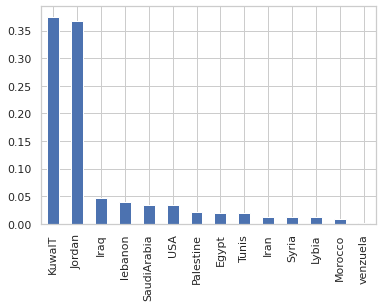

In [54]:
df['PlaceofBirth'].value_counts(normalize = True).plot(kind = 'bar')

* Most of these countries r in the middle east(Islamic states) , perhaps this explains the gender disparity 

## StageID 

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64
%
 :  MiddleSchool    0.516667
lowerlevel      0.414583
HighSchool      0.068750
Name: StageID, dtype: float64


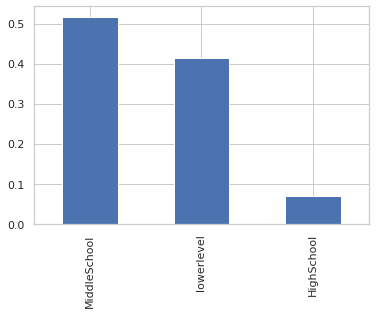

In [61]:
print(df['StageID'].value_counts())
print('%\n : ',df['StageID'].value_counts(normalize = True))

df['StageID'].value_counts(normalize = True).plot(kind = 'bar')

## Grade ID

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64
%
 :  G-02    0.306250
G-08    0.241667
G-07    0.210417
G-04    0.100000
G-06    0.066667
G-11    0.027083
G-12    0.022917
G-09    0.010417
G-10    0.008333
G-05    0.006250
Name: GradeID, dtype: float64


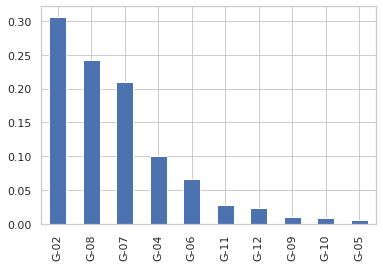

In [62]:
print(df['GradeID'].value_counts())
print('%\n : ',df['GradeID'].value_counts(normalize = True))

df['GradeID'].value_counts(normalize = True).plot(kind = 'bar')

## Topic

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64
%
 :  IT           0.197917
French       0.135417
Arabic       0.122917
Science      0.106250
English      0.093750
Biology      0.062500
Spanish      0.052083
Chemistry    0.050000
Geology      0.050000
Quran        0.045833
Math         0.043750
History      0.039583
Name: Topic, dtype: float64


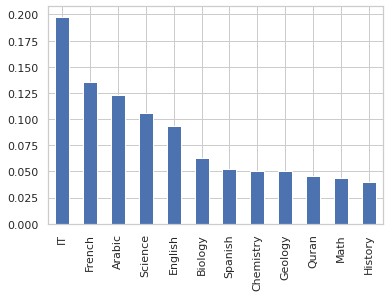

In [64]:
print(df['Topic'].value_counts())
print('%\n : ',df['Topic'].value_counts(normalize = True))

df['Topic'].value_counts(normalize = True).plot(kind = 'bar')

##Semester Value

F    245
S    235
Name: Semester, dtype: int64
%
 :  F    0.510417
S    0.489583
Name: Semester, dtype: float64


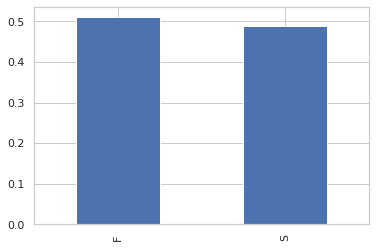

In [65]:
print(df['Semester'].value_counts())
print('%\n : ',df['Semester'].value_counts(normalize = True))

df['Semester'].value_counts(normalize = True).plot(kind = 'bar')

##Relation

Father    283
Mum       197
Name: Relation, dtype: int64
%
 :  Father    0.589583
Mum       0.410417
Name: Relation, dtype: float64


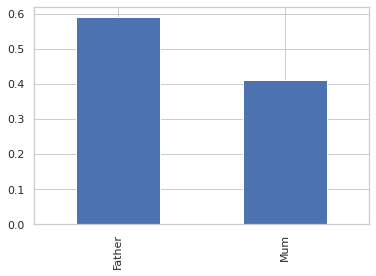

In [66]:
print(df['Relation'].value_counts())
print('%\n : ',df['Relation'].value_counts(normalize = True))

df['Relation'].value_counts(normalize = True).plot(kind = 'bar')

##Raisedhands 

In [72]:
df['raisedhands'].value_counts().head(10)

10    31
70    31
80    28
72    17
50    17
15    14
60    12
12    12
20    11
90    11
Name: raisedhands, dtype: int64

In [ ]:
#print('Parcentage',df.raisedhands.value_counts(normalize=True))
#df.raisedhands.value_counts(normalize=True).plot(kind='bar')
color_brewer = ['#41B5A3','#FFAF87','#FF8E72','#ED6A5E','#377771','#E89005','#C6000D','#000000','#05668D','#028090','#9FD35C',
                '#02C39A','#F0F3BD','#41B5A3','#FF6F59','#254441','#B2B09B','#EF3054','#9D9CE8','#0F4777','#5F67DD','#235077','#CCE4F9','#1748D1',
                '#8BB3D6','#467196','#F2C4A2','#F2B1A4','#C42746','#330C25']
fig= {
    'data' : [ {
        'values' : df['raisedhands'].value_counts().values ,
        'labels' : df['raisedhands'].value_counts().index, 
        'domain' : {'x' : [0, 0.95]} ,
        'name' : 'Rasiedhands PCT', 
        'hoverinfo' : 'label +percent + name',
        'hole' : 0.7,
        'type' : 'pie',
        'marker' : {'colors' : [i for i in reversed(color_brewer)]}, 
        'textfont' : {'color' : '#FFFFFF'} }] , 
    'layout' : {
        'title' : "Raisedhands Parcentage", 
        'annotations' : [
            {
                'font' : { 'size' : 15}, 
                'showarrow' : False,
                'text' :  "Raisedhands Parcentage",
                'x': 0.47,
                'y': 0.5
            }
        ]
    }
}
iplot(fig, filename='donut')
 #> 왜 그래프가 안나오지? ???????????????????????????????????

##ParentschoolSatisfaction 

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64
%
 :  Good    0.608333
Bad     0.391667
Name: ParentschoolSatisfaction, dtype: float64


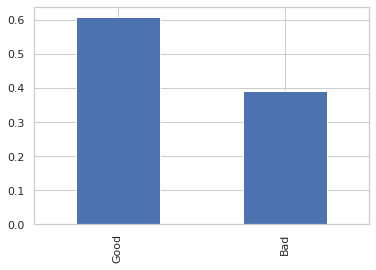

In [87]:
print(df['ParentschoolSatisfaction'].value_counts())
print('%\n : ',df['ParentschoolSatisfaction'].value_counts(normalize = True))

df['ParentschoolSatisfaction'].value_counts(normalize = True).plot(kind = 'bar')

##ParentAnsweringSurvey 

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64
%
 :  Yes    0.5625
No     0.4375
Name: ParentAnsweringSurvey, dtype: float64


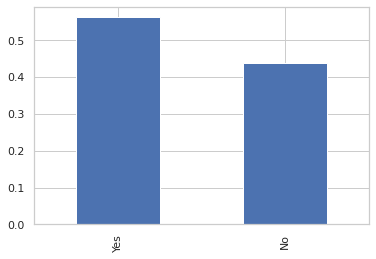

In [88]:
print(df['ParentAnsweringSurvey'].value_counts())
print('%\n : ',df['ParentAnsweringSurvey'].value_counts(normalize = True))

df['ParentAnsweringSurvey'].value_counts(normalize = True).plot(kind = 'bar')

##StudentAbsenceDays 

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64
%
 :  Under-7    0.602083
Above-7    0.397917
Name: StudentAbsenceDays, dtype: float64


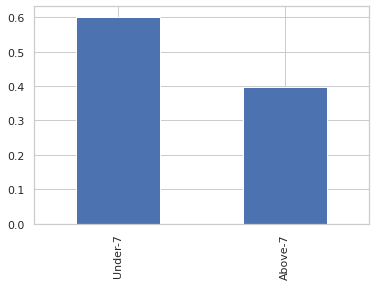

In [89]:
print(df['StudentAbsenceDays'].value_counts())
print('%\n : ',df['StudentAbsenceDays'].value_counts(normalize = True))

df['StudentAbsenceDays'].value_counts(normalize = True).plot(kind = 'bar')

##Class 

M    211
H    142
L    127
Name: Class, dtype: int64
%
 :  M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64


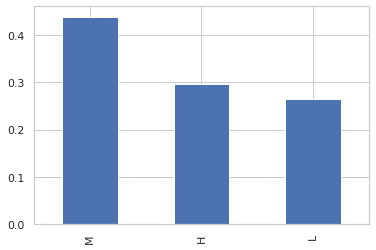

In [90]:
print(df['Class'].value_counts())
print('%\n : ',df['Class'].value_counts(normalize = True))

df['Class'].value_counts(normalize = True).plot(kind = 'bar')

* Girls seem to have performed better than boys 
* Girls had much better attendance than boys</p>
* I'll start with visualizing just the categorical features indicidually to see what options are included & how each option fares when it comes to count(how many times it appears) and see what i can deduce from that 
</b>

# Cat_feature EDA

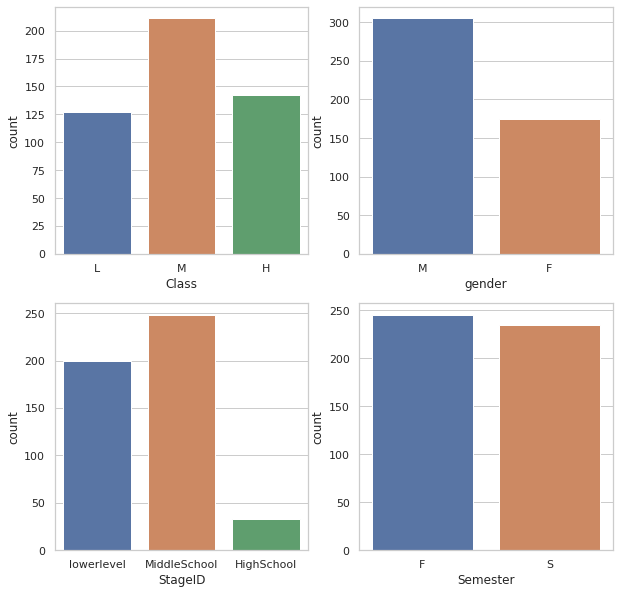

In [92]:
fig, axarr = plt.subplots(2,2, figsize = (10,10))
sns.countplot(x = 'Class' ,data =df, ax = axarr[0,0], order = ['L','M','H'])
sns.countplot(x = 'gender', data = df, ax = axarr[0,1], order = ['M', 'F'])
sns.countplot(x = 'StageID', data = df, ax = axarr[1,0])
sns.countplot(x = 'Semester', data = df, ax = axarr[1,1])

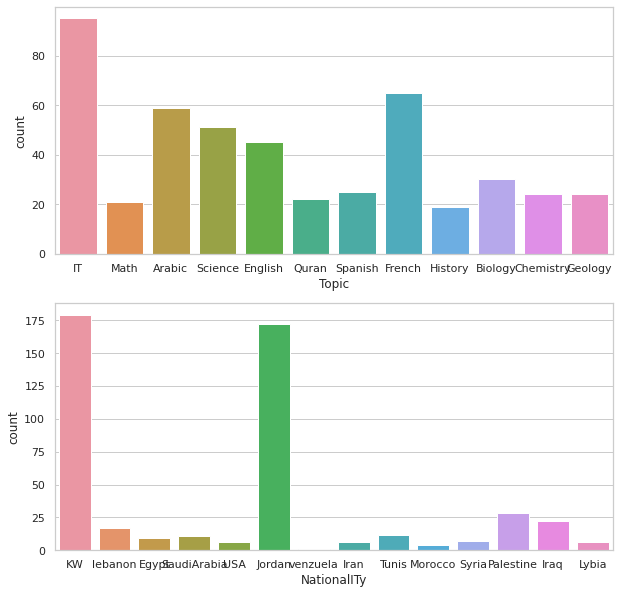

In [93]:
fig, (axis1, axis2) = plt.subplots(2,1,figsize = (10,10))
sns.countplot(x = 'Topic', data = df, ax = axis1)
sns.countplot(x = 'NationalITy', data = df, ax = axis2)

* Next I will look at some categorical features in relation to each other, to see what insights that could possibly read

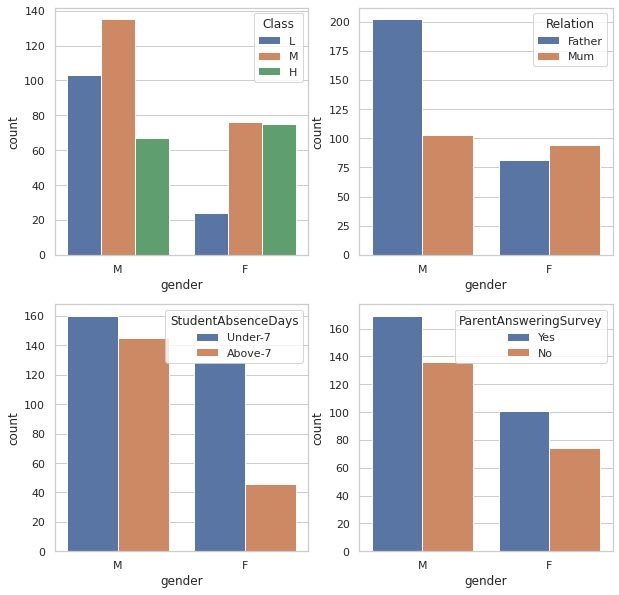

In [96]:
fig, axarr = plt.subplots(2,2, figsize = (10,10))
sns.countplot(x = 'gender', hue = 'Class', data  = df, ax = axarr[0,0], order = ['M', 'F'], hue_order = ['L','M','H'])
sns.countplot(x = 'gender', hue = 'Relation', data  = df, ax = axarr[0,1], order = ['M', 'F'])
sns.countplot(x = 'gender', hue = 'StudentAbsenceDays', data  = df, ax = axarr[1,0], order = ['M', 'F'])
sns.countplot(x = 'gender', hue = 'ParentAnsweringSurvey', data  = df, ax = axarr[1,1], order = ['M', 'F'])

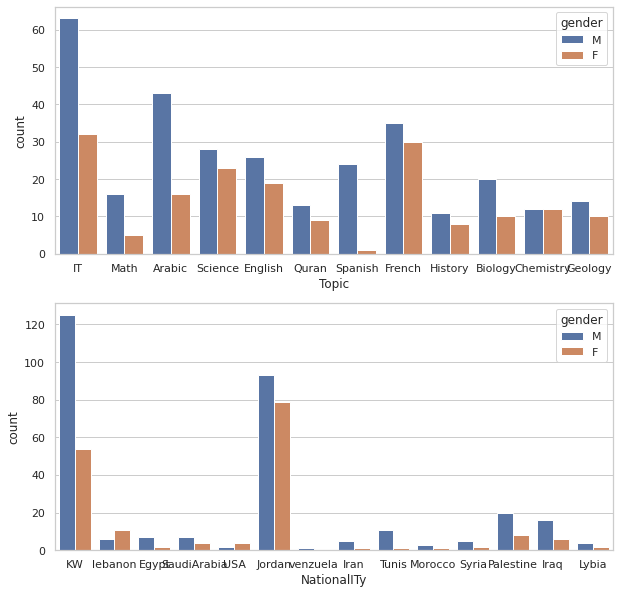

In [97]:
fig, (axis1, axis2)  = plt.subplots(2,1, figsize = (10,10))
sns.countplot(x = 'Topic', hue = 'gender', data = df, ax = axis1)
sns.countplot(x = 'NationalITy', hue = 'gender', data = df, ax = axis2)

* No apparent gender bias when it comes to subject/topic choices, we can't concluded that girls performed better cuz they perhaps took less technical subject 
* Gender disparity holds even at a country level. May just be as a result of the sampling

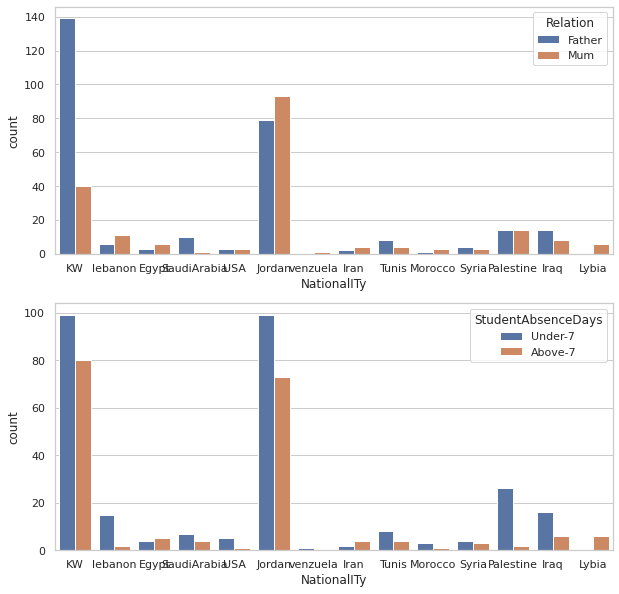

In [98]:
fig, (axis1, axis2) = plt.subplots(2,1, figsize = (10,10))
sns.countplot(x = 'NationalITy', hue = 'Relation' , data = df, ax = axis1)
sns.countplot(x = 'NationalITy', hue = 'StudentAbsenceDays' , data = df, ax = axis2)

# CAT + NUM EDA

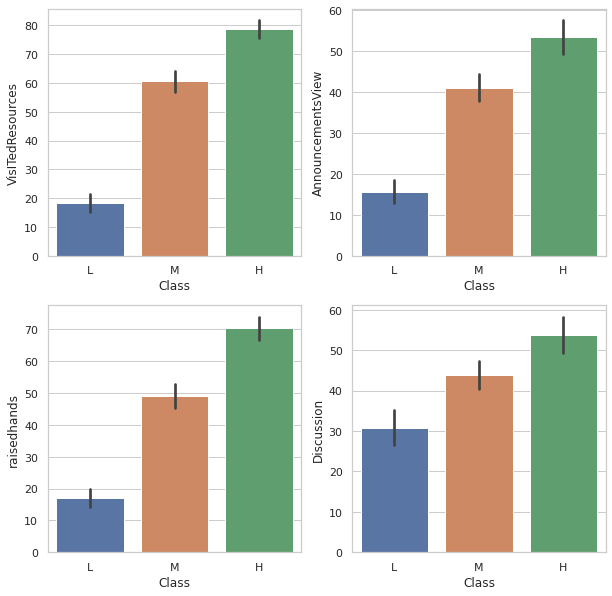

In [99]:
fig, axarr = plt.subplots(2,2, figsize = (10,10))
sns.barplot(x='Class', y='VisITedResources', data=df, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=df, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=df, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=df, order=['L','M','H'], ax=axarr[1,1])

* As expected, those that participated more (higher counts in Discussion, raisedhands, AnnouncementViews, RaisedHands), performed better that thing about correlation and causation
</b>


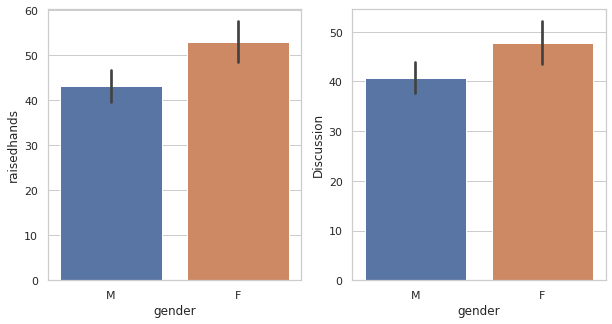

In [101]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='gender', y='raisedhands', data=df, ax=axis1)
sns.barplot(x='gender', y='Discussion', data=df, ax=axis2)

##There are various other plots that help visualize Categorical vs Numerical data better.

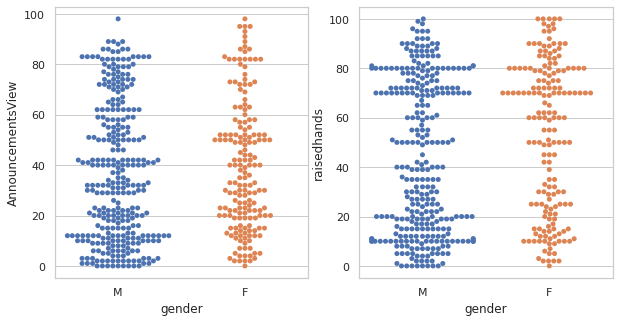

In [102]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.swarmplot(x='gender', y = 'AnnouncementsView', data = df, ax = axis1)
sns.swarmplot(x = 'gender', y = 'raisedhands', data = df, ax = axis2)

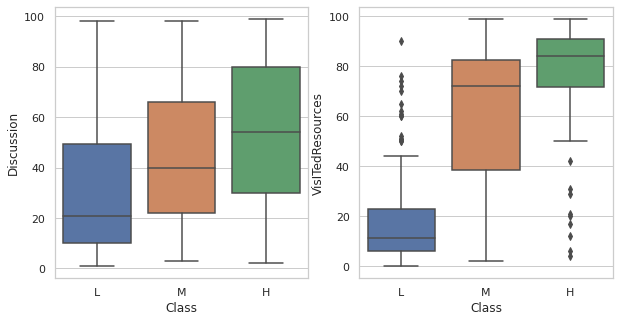

In [103]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.boxplot(x = 'Class', y= 'Discussion', data = df, order =['L','M','H'], ax = axis1 )
sns.boxplot(x = 'Class', y= 'VisITedResources', data = df, order =['L','M','H'], ax = axis2 )

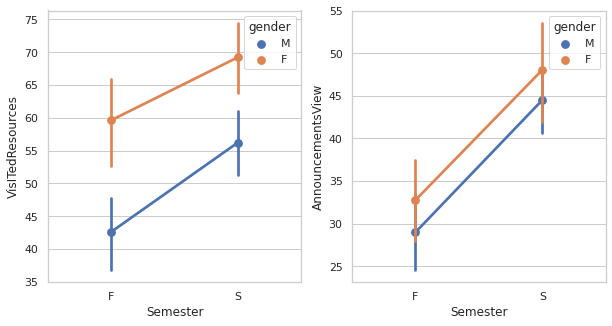

In [104]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x = 'Semester', y = 'VisITedResources', hue = 'gender', data =df, ax = axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=df, ax=axis2)

# Numerical_features EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



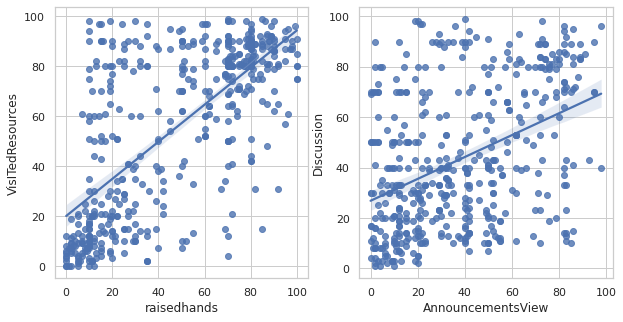

In [106]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.regplot('raisedhands', 'VisITedResources', data= df, ax = axis1)
sns.regplot('AnnouncementsView', 'Discussion', data= df, ax = axis2)

Gender Comparison With Parents Relationship

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



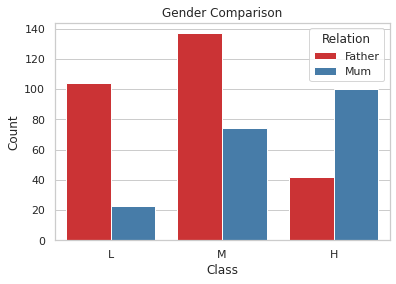

In [107]:
plot = sns.countplot('Class',hue = 'Relation', data = df, order =['L', 'M', 'H'],
                     palette = 'Set1')
plot.set(xlabel = 'Class', ylabel = 'Count', title = 'Gender Comparison')
plt.show()

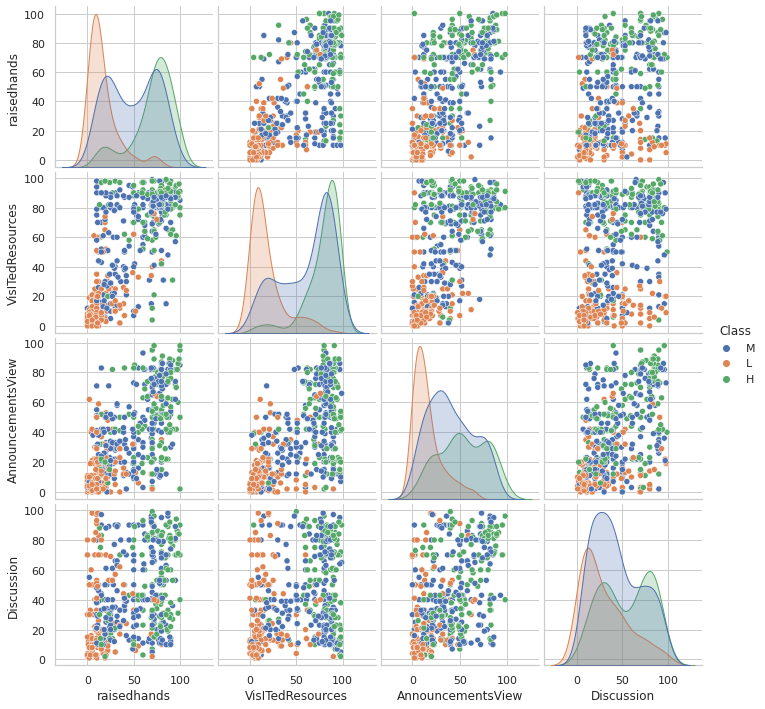

In [108]:
sns.pairplot(df, hue = 'Class')

Graph with 16 nodes and 26 edges


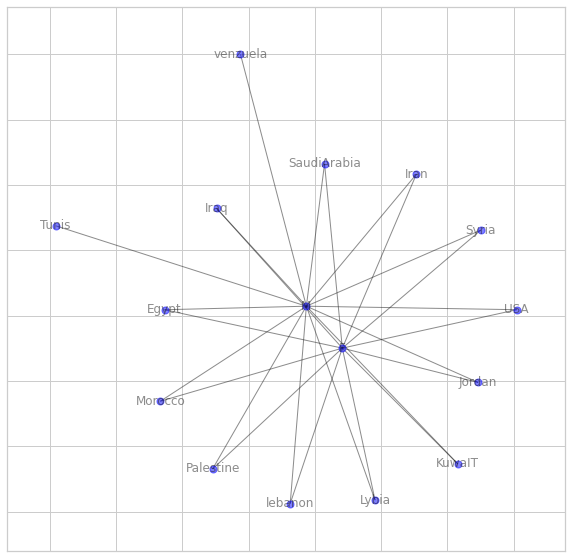

In [122]:
import networkx as nx

g= nx.Graph()
g = nx.from_pandas_edgelist(df, source = 'gender', target = 'PlaceofBirth') #nx.from_pandas_dataframe로하면 오류나서 변경
print(nx.info(g))

plt.figure(figsize = (10,10))
nx.draw_networkx(g, with_labels = True, node_size = 50, alpha = 0.5, node_color = 'blue')
plt.show()

#Machine Learning Algorithm applying:Harun-Ur-Rashid

## Label Encoding 

### Gender Encoding

In [130]:
X = df.drop('gender', axis = 1)
y = df['gender']
label = LabelEncoder()
cat_c = X.dtypes.pipe(lambda X : X[X == 'object']).index 

for c in cat_c : 
    X[c] = label.fit_transform(X[c])

###2. Semester Encoding

In [132]:
X = df.drop('Semester', axis = 1)
y = df['Semester']
label = LabelEncoder()
cat_c = X.dtypes.pipe(lambda X : X[X ==  'object']).index
for c in cat_c : 
    X[c] = label.fit_transform(X[c])

###3.ParentAnsweringSurvey Encoding

In [133]:
X = df.drop('ParentAnsweringSurvey', axis = 1)
y = df['ParentAnsweringSurvey']
label = LabelEncoder()
cat_c = X.dtypes.pipe(lambda X : X[X ==  'object']).index
for c in cat_c : 
    X[c] = label.fit_transform(X[c])

### 4.Relation Encoding

In [136]:
X = df.drop('Relation', axis = 1)
y = df['Relation']
label = LabelEncoder()
cat_c = X.dtypes.pipe(lambda X : X[X == 'object']).index
for c in cat_c : 
    X[c] = label.fit_transform(X[c])

###5.ParentschoolSatisfaction Encoding

In [137]:
X = df.drop('ParentschoolSatisfaction', axis = 1)
y = df['ParentschoolSatisfaction']
label = LabelEncoder()
cat_c = X.dtypes.pipe(lambda X : X[X == 'object']).index
for c in cat_c : 
    X[c] = label.fit_transform(X[c])

###6.StudentAbsenceDays Encoding

In [138]:
X = df.drop('StudentAbsenceDays', axis = 1)
y = df['StudentAbsenceDays']
label = LabelEncoder()
cat_c = X.dtypes.pipe(lambda X : X[X == 'object']).index
for c in cat_c : 
    X[c] = label.fit_transform(X[c])

In [139]:
X = df.drop('Class', axis = 1)
y = df['Class']
label = LabelEncoder()
cat_c = X.dtypes.pipe(lambda X : X[X == 'object']).index
for c in cat_c : 
    X[c] = label.fit_transform(X[c])

##Test and Train Data Split

In [140]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2, random_state = 52)

##Logistic Regression Model

In [142]:
lr = LogisticRegression(max_iter = 10000)
lr = lr.fit(X_tr, y_tr)

In [144]:
pred = lr.predict(X_te)
report = classification_report(y_te, pred)
print(report)

              precision    recall  f1-score   support

           H       0.87      0.77      0.82        35
           L       0.81      0.95      0.88        22
           M       0.79      0.79      0.79        39

    accuracy                           0.82        96
   macro avg       0.82      0.84      0.83        96
weighted avg       0.83      0.82      0.82        96



##XGBoost

In [146]:
xgb = XGBClassifier(max_depth = 10, learning_rate = 0.1, n_estimators=100, seed = 10)
xgb_pred = xgb.fit(X_tr, y_tr).predict(X_te)

In [148]:
print (classification_report(y_te,xgb_pred))

              precision    recall  f1-score   support

           H       0.88      0.80      0.84        35
           L       0.85      1.00      0.92        22
           M       0.82      0.79      0.81        39

    accuracy                           0.84        96
   macro avg       0.85      0.86      0.85        96
weighted avg       0.84      0.84      0.84        96



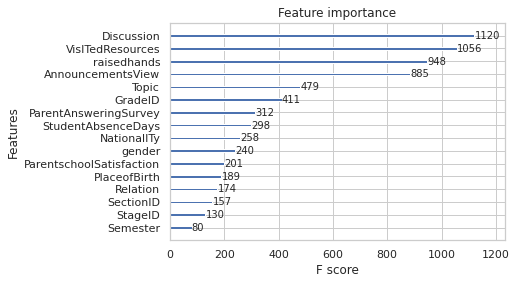

In [149]:
plot_importance(xgb)